# Cas Kaggle: Spotify Music DataBase
## Anàlisi de les cançons presents a la base de dades de Spotify

## Objectius

Els objectius d'aquesta pràctica són:
* Entendre els diferents atributs de la base de dades.
* Visualitzar la correlació que els atributs tenen entre ells.
* Crear un model predictiu sobre la popularitat d'una cançó a partir d'altres atributs.

In [7]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
%matplotlib inline 
import scipy.stats

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('SpotifyFeatures.csv')
data = dataset.values

x = data[:, :2]
y = data[:, 2]

print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (232725, 18)
Dimensionalitat de les entrades X (232725, 2)
Dimensionalitat de l'atribut Y (232725,)


In [8]:
print("Número de valors no existents per cada columna de la BD:")
print(dataset.isnull().sum())

Número de valors no existents per cada columna de la BD:
genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


In [9]:
print("Primeres 5 linies de la BD:")
dataset.head()

Primeres 5 linies de la BD:


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.346,-1.828,Major,0.052,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.151,-5.559,Minor,0.087,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.103,-13.879,Minor,0.036,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.099,-12.178,Major,0.040,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.202,-21.150,Major,0.046,140.576,4/4,0.390


In [10]:
print("Estadístiques dels atributs numèrics de la BD:")
dataset.describe()

Estadístiques dels atributs numèrics de la BD:


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000,232725.000,232725.000,232725.000,232725.000,232725.000,232725.000,232725.000,232725.000,232725.000,232725.000
mean,41.128,0.369,0.554,235122.339,0.571,0.148,0.215,-9.570,0.121,117.667,0.455
std,18.190,0.355,0.186,118935.909,0.263,0.303,0.198,5.998,0.186,30.899,0.260
min,0.000,0.000,0.057,15387.000,0.000,0.000,0.010,-52.457,0.022,30.379,0.000
25%,29.000,0.038,0.435,182857.000,0.385,0.000,0.097,-11.771,0.037,92.959,0.237
50%,43.000,0.232,0.571,220427.000,0.605,0.000,0.128,-7.762,0.050,115.778,0.444
75%,55.000,0.722,0.692,265768.000,0.787,0.036,0.264,-5.501,0.105,139.054,0.660
max,100.000,0.996,0.989,5552917.000,0.999,0.999,1.000,3.744,0.967,242.903,1.000


Text(0, 0.5, 'Popularity')

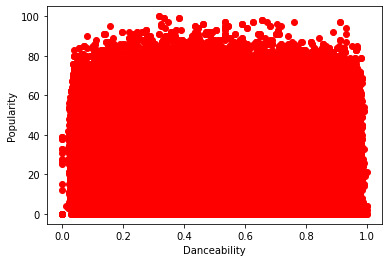